# 정면 사진에 고양이 스티커 붙이기

In [53]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

Image import

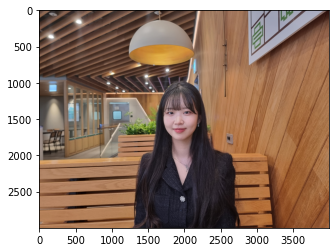

In [99]:
my_image_path = 'camera_sticker/images/yejimage.png' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()  

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dlib hog detectoer 선언

rectangles[[(1650, 1281) (2205, 1836)]]
얼굴 1개 감지!


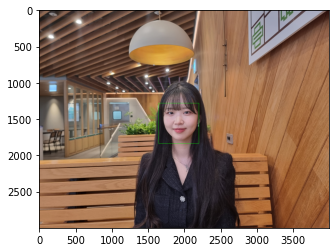

In [100]:
#bounding box에 이미지 복사
img_rgb_bounding = img_rgb.copy()

#기본 얼굴 감지기
detector_hog = dlib.get_frontal_face_detector()

#감지기를 이용하여 Bounding box 추출
dlib_rects = detector_hog(img_rgb_bounding, 1) 

#찾은 얼굴 영역 박스 리스트
print(dlib_rects)
for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

if len(dlib_rects) == 0:
    print("얼굴 감지 실패!")
else:
    print(f"얼굴 {len(dlib_rects)}개 감지!")
    
plt.imshow(img_rgb_bounding)
plt.show()

 'rectangles[[(345, 98) (531, 284)]]'
left : 345
top : 98
right : 531
bottom : 284

Landmark model import

In [59]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

Landmark image genaration

68


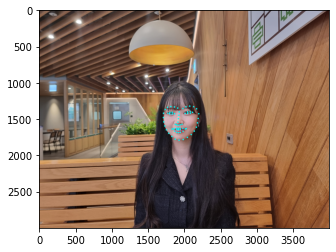

In [62]:
# landmark에 사용할 이미지 복사
img_rgb_land = img_rgb.copy()

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고, face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
    
    
# 저장된 좌표점을 실제 사진에 표시
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(img_rgb_land)
plt.show()

스티커 위치 및 크기 추출

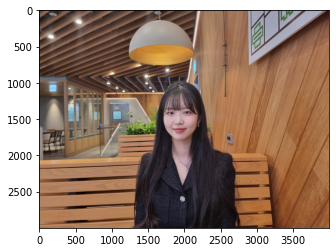

In [61]:
# landmark point 위치 확인
img_rgb_check = img_rgb.copy()

cv2.circle(img_rgb_check, list_landmarks[0][30], 10, (0, 255, 255), -1)
        
plt.imshow(img_rgb_check)
plt.show()

In [63]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1916, 1542)
(x,y) : (1916,1264)
(w,h) : (556,556)


In [66]:
sticker_path = 'camera_sticker/images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb) 

print (img_sticker_rgb.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(556, 556, 3)


(x,y) : (1638,1264)


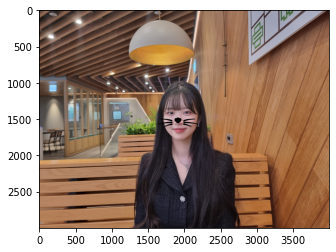

In [84]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187


refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y # 89-187 = -98

print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = img_rgb[refined_y:refined_y+img_sticker_rgb.shape[0], refined_x:refined_x+img_sticker_rgb.shape[1]]

img_rgb[refined_y:refined_y+img_sticker_rgb.shape[0], refined_x:refined_x+img_sticker_rgb.shape[1]] = \
    np.where(img_sticker_rgb!=0, sticker_area, img_sticker_rgb).astype(np.uint8)

plt.imshow(img_rgb)
plt.show()

# 얼굴 측면 사진

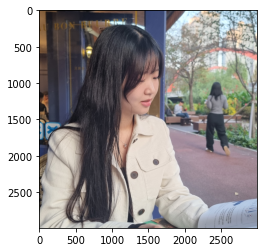

In [88]:
my_image_side = 'camera_sticker/images/side.jpg'
side_bgr = cv2.imread(my_image_side)

side_show = side_bgr.copy()#이미지 백업

side_rgb = cv2.cvtColor(side_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(side_rgb)
plt.show()

rectangles[]
얼굴 감지 실패!


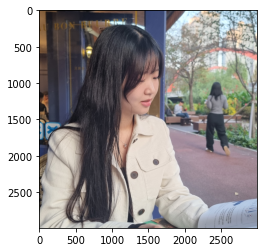

In [101]:
# bounding box에 사용할 이미지 복사
side_bounding = side_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(side_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(side_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


if len(dlib_rects) == 0:
    print("얼굴 감지 실패!")
else:
    print(f"얼굴 {len(dlib_rects)}개 감지!")
    
plt.imshow(side_bounding)
plt.show()

기본 얼굴 감지기(frontal)이므로, 측면의 얼굴 사진은 얼굴로 인식하지 못하였다.

# 그림자로 얼굴이 가려진 사진

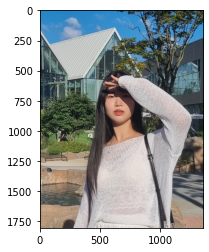

In [118]:
my_image_shadow = 'camera_sticker/images/shadow.jpg'
shadow_bgr = cv2.imread(my_image_shadow)

shadow_show = side_bgr.copy()#이미지 백업

shadow_rgb = cv2.cvtColor(shadow_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(shadow_rgb)
plt.show()

rectangles[[(538, 663) (761, 885)]]
얼굴 1개 감지!


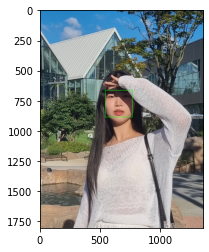

In [109]:
# bounding box에 사용할 이미지 복사
shadow_bounding = shadow_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(shadow_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(shadow_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


if len(dlib_rects) == 0:
    print("얼굴 감지 실패!")
else:
    print(f"얼굴 {len(dlib_rects)}개 감지!")
    
plt.imshow(shadow_bounding)
plt.show()

68


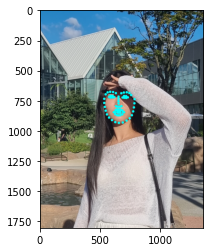

In [110]:
#Landmark Model
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark에 사용할 이미지 복사
shadow_land = shadow_rgb.copy()

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아내고, face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(shadow_rgb, dlib_rect)
        # 모든 landmark의 위치정보 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
    
    
# 저장된 좌표점을 실제 사진에 표시
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(shadow_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(shadow_land)
plt.show()

landmark point


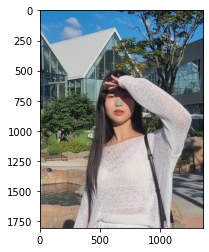

In [119]:
# landmark point 위치 확인
shadow_check = shadow_rgb.copy()

cv2.circle(shadow_check, list_landmarks[0][30], 10, (0, 255, 255), -1)

print(f"landmark point")
plt.imshow(shadow_check)
plt.show()

(647, 774)
(x,y) : (647,663)
(w,h) : (224,224)
(224, 224, 3)
(x,y) : (535,663)


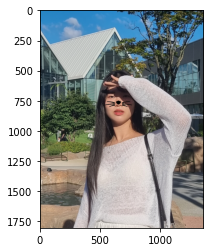

In [117]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
    
sticker_path = 'camera_sticker/images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb) 

print (img_sticker_rgb.shape)

refined_x = x - w // 2
refined_y = y 

print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = shadow_rgb[refined_y:refined_y+img_sticker_rgb.shape[0], refined_x:refined_x+img_sticker_rgb.shape[1]]

shadow_rgb[refined_y:refined_y+img_sticker_rgb.shape[0], refined_x:refined_x+img_sticker_rgb.shape[1]] = \
    np.where(img_sticker_rgb!=0, sticker_area, img_sticker_rgb).astype(np.uint8)

plt.imshow(shadow_rgb)
plt.show()

얼굴이 그림자로 가려져 있어도 얼굴인식은 잘 했다. 그러나 스티커의 크기가 작아졌다. 